In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime

In [19]:
dfBinance = pd.read_csv('Binance_ETHUSDT_1h.csv', skiprows=1)
dfBinance = dfBinance.rename(columns={"Close": "Binance_close"})

dfBitstamp = pd.read_csv('Bitstamp_ETHUSD_1h.csv', skiprows=1)
dfBitstamp =dfBitstamp.rename(columns={"Close": "Bitstamp_close"})

dfBittrex = pd.read_csv('Bittrex_ETHUSD_1h.csv', skiprows=1)
dfBittrex = dfBittrex.rename(columns={"Close": "Bittrex_close"})

dfCoinbase = pd.read_csv('Coinbase_ETHUSD_1h.csv', skiprows=1)
dfCoinbase = dfCoinbase.rename(columns={"Close": "Coinbase_close"})

dfKraken = pd.read_csv('Kraken_ETHUSD_1h.csv', skiprows=1)
dfKraken = dfKraken.rename(columns={"Close": "Kraken_close"})

In [20]:
dfBinance = dfBinance[['Date','Binance_close']]
dfBitstamp = dfBitstamp[['Date','Bitstamp_close']]
dfBittrex = dfBittrex[['Date','Bittrex_close']]
dfCoinbase = dfCoinbase[['Date','Coinbase_close']]
dfKraken = dfKraken[['Date','Kraken_close']]

In [21]:
dfcombined1 = pd.merge(dfBinance, dfBitstamp, on='Date', how='inner')
dfcombined2 = pd.merge(dfBittrex, dfCoinbase, on='Date', how='inner')
dfcombined3 = pd.merge(dfcombined2, dfKraken, on='Date', how='inner')
dfcombined4 = pd.merge(dfcombined3, dfcombined1, on='Date', how='inner')
dfcombined4.head()

,Date,Bittrex_close,Coinbase_close,Kraken_close,Binance_close,Bitstamp_close
0,2019-07-30 01-AM,210.17,208.31,208.80,208.56,208.34
1,2019-07-30 12-AM,210.17,209.82,209.71,210.26,209.88
2,2019-07-29 11-PM,210.71,210.73,210.69,210.89,210.81
3,2019-07-29 10-PM,210.90,211.08,211.19,211.70,211.43
4,2019-07-29 09-PM,210.66,210.87,210.79,210.77,210.52


In [22]:
dfcombined4['Date'] = pd.to_datetime(dfcombined4['Date'], format = '%Y-%m-%d %I-%p')
dfcombined4.set_index('Date', inplace = True)
dfcombined4.head()

,Bittrex_close,Coinbase_close,Kraken_close,Binance_close,Bitstamp_close
Date,,,,,
2019-07-30 01:00:00,210.17,208.31,208.80,208.56,208.34
2019-07-30 00:00:00,210.17,209.82,209.71,210.26,209.88
2019-07-29 23:00:00,210.71,210.73,210.69,210.89,210.81
2019-07-29 22:00:00,210.90,211.08,211.19,211.70,211.43
2019-07-29 21:00:00,210.66,210.87,210.79,210.77,210.52


No handles with labels found to put in legend.


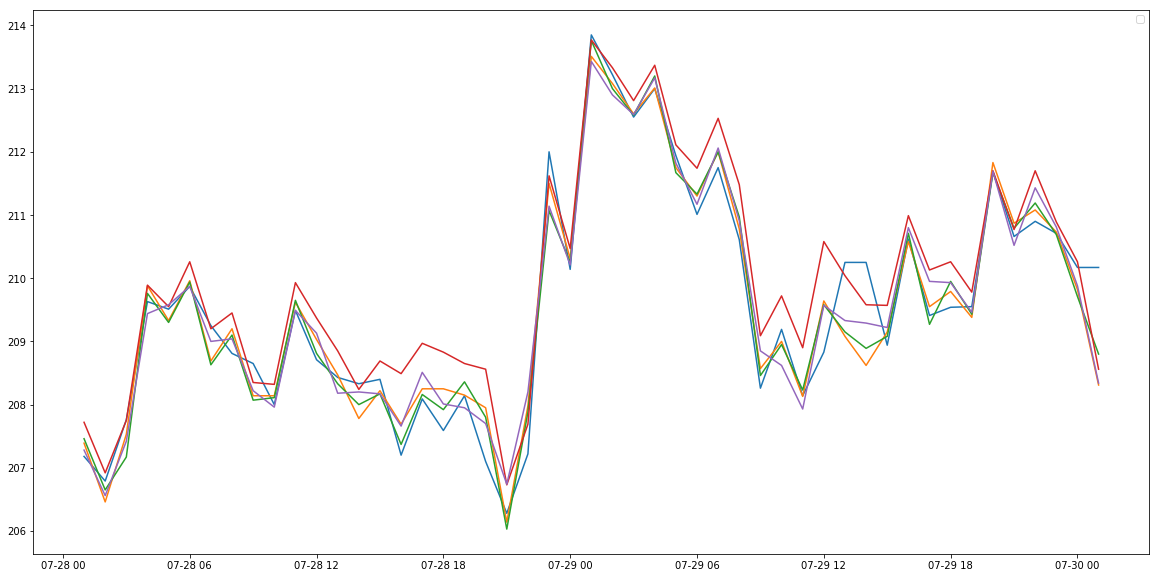

In [32]:
plt.figure(figsize=(20,10))
plt.plot(dfcombined4['2019-07-30 01:00:00':'2019-07-28 01:00:00']) # plotting only last 2 days to make the chart more visible
plt.legend(loc='best')
plt.show()